In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)


In [16]:
print("=" * 60)
print("EMPLOYEE PRODUCTIVITY EXPLORATORY DATA ANALYSIS")
print("=" * 60)

EMPLOYEE PRODUCTIVITY EXPLORATORY DATA ANALYSIS


In [17]:
df = pd.read_csv('Employee_productivity.csv')

In [22]:
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")
print("\n2. DATASET INFORMATION")
print("-" * 30)
print(df.info())

print("\n3. FIRST 5 ROWS")
print("-" * 30)
print(df.head())

print("\n4. FEATURE DESCRIPTIONS AND DATA TYPES")
print("-" * 40)

# Identify numerical and categorical features
numerical_features = ['HoursWorked', 'FocusScore', 'YearsAtCompany', 'TeamMeetingsPerWeek']
categorical_features = ['Department', 'DeskLocation']
target_feature = 'ProductivityScore'

print(f"Target Variable: {target_feature}")
print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

print("\n5. BASIC STATISTICS FOR NUMERICAL FEATURES")
print("-" * 45)
print(df[numerical_features + [target_feature]].describe())
print("\n6. UNIQUE VALUES IN CATEGORICAL FEATURES")
print("-" * 45)
for feature in categorical_features:
    print(f"\n{feature}:")
    print(f"  Unique values: {df[feature].unique()}")
    print(f"  Value counts:")
    print(df[feature].value_counts().to_string())

print("\n7. MISSING VALUES CHECK")
print("-" * 30)
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✓ No missing values found in the dataset!")


1. DATASET OVERVIEW
------------------------------
Dataset shape: (300, 7)
Number of rows: 300
Number of features: 7

Column names: ['HoursWorked', 'FocusScore', 'ProductivityScore', 'Department', 'YearsAtCompany', 'TeamMeetingsPerWeek', 'DeskLocation']

2. DATASET INFORMATION
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HoursWorked          300 non-null    float64
 1   FocusScore           300 non-null    float64
 2   ProductivityScore    300 non-null    float64
 3   Department           300 non-null    object 
 4   YearsAtCompany       300 non-null    int64  
 5   TeamMeetingsPerWeek  300 non-null    int64  
 6   DeskLocation         300 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ KB
None

3. FIRST 5 ROWS
------------------------------
   HoursWorked  Focu


8. RELATIONSHIP ANALYSIS: FEATURES vs PRODUCTIVITY SCORE
------------------------------------------------------------


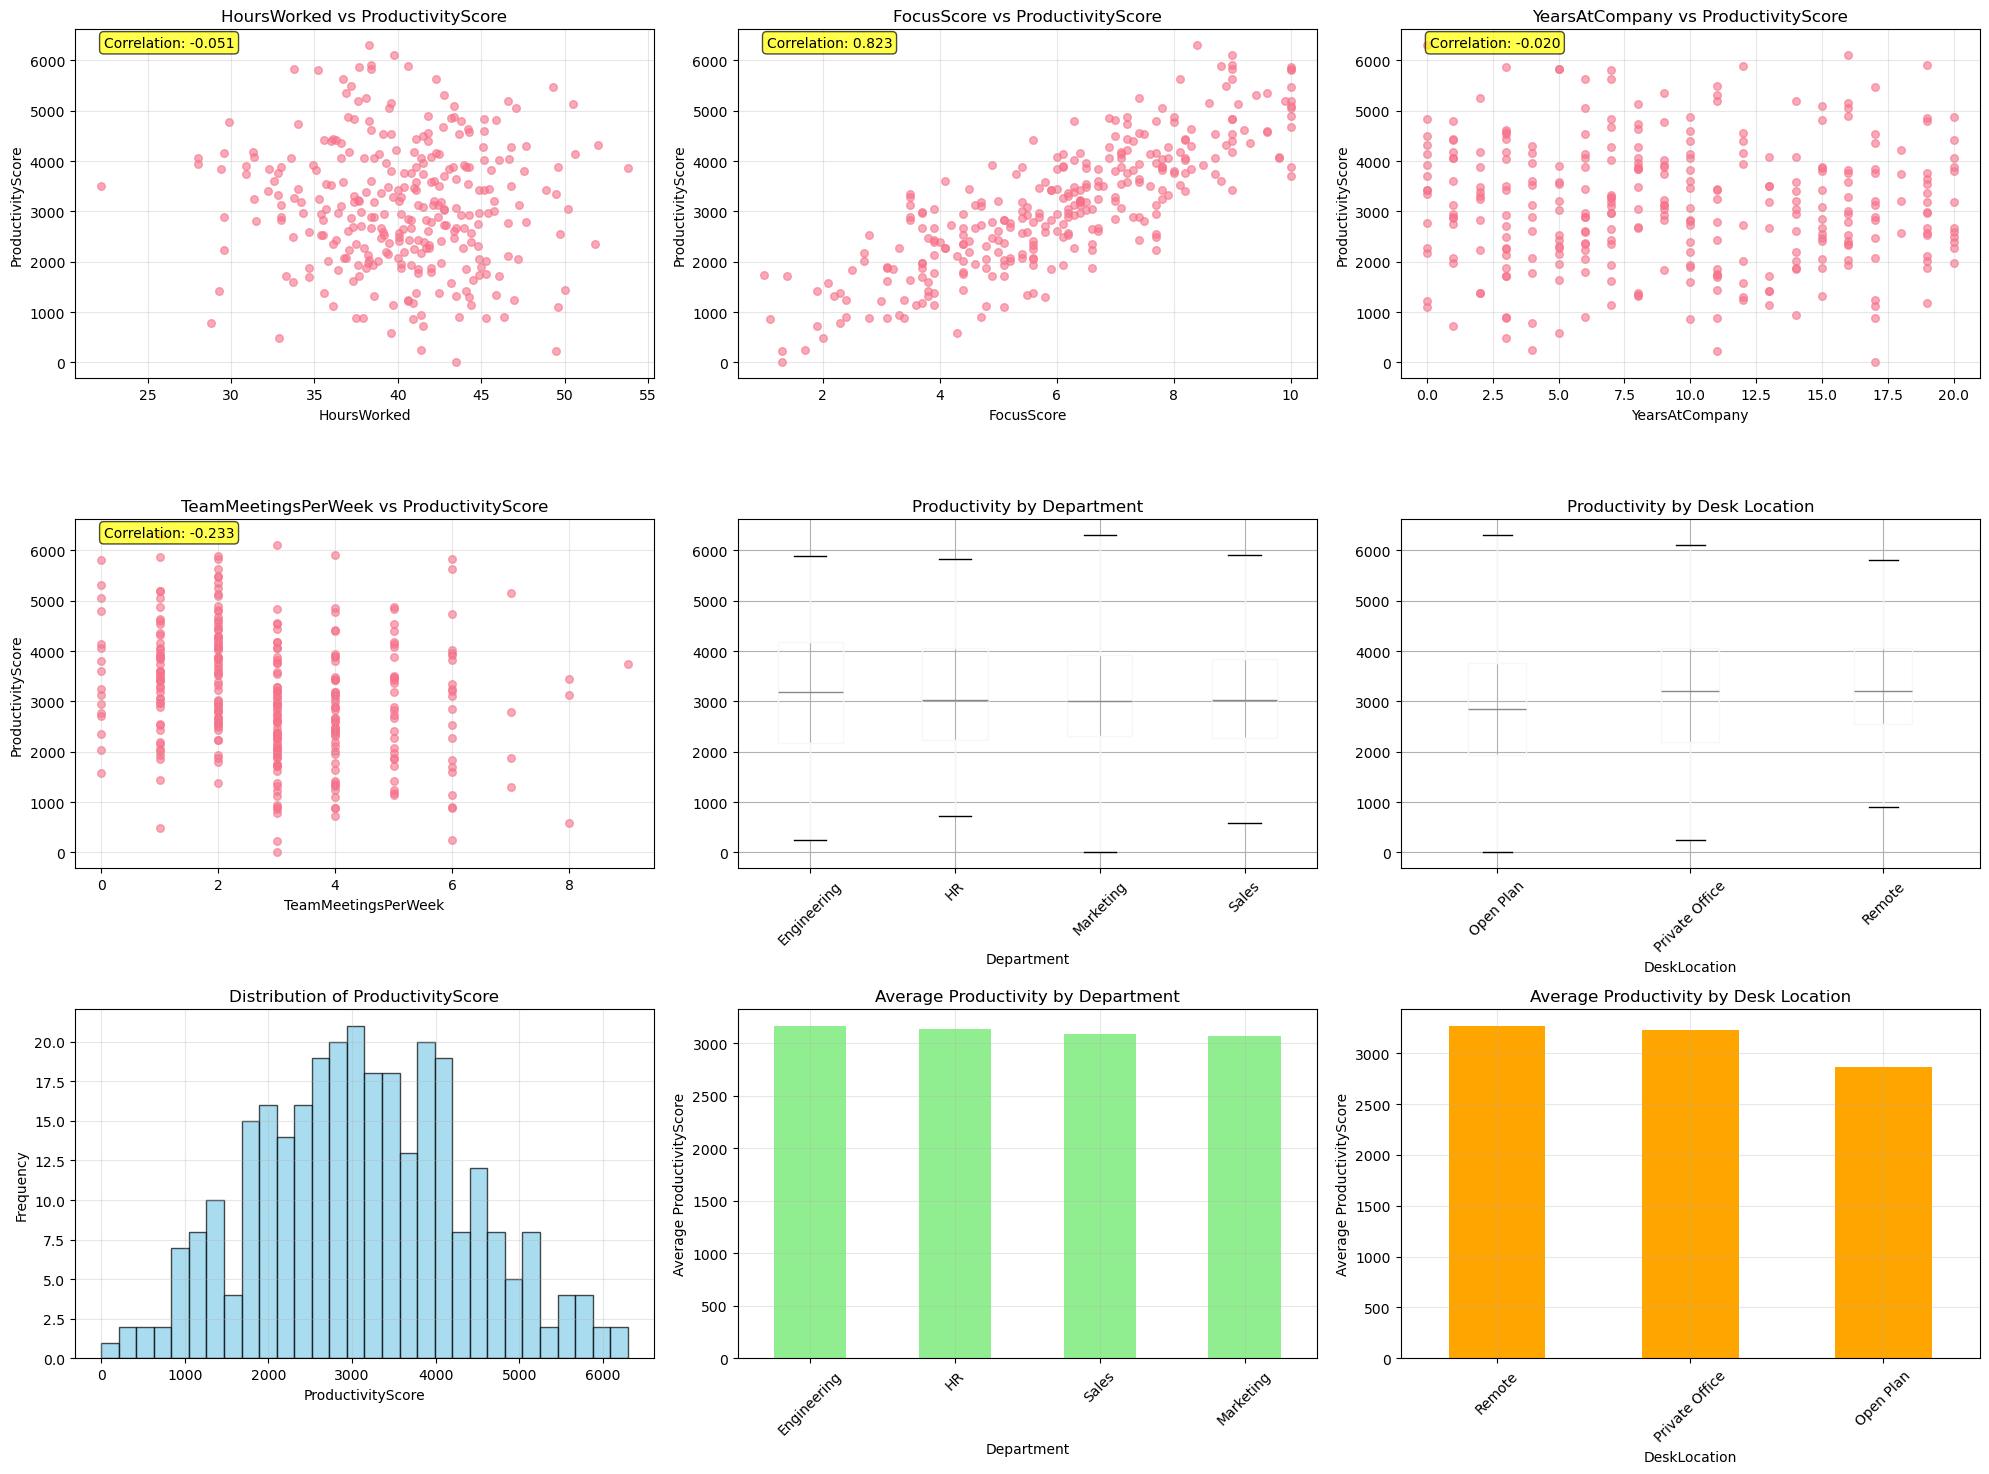

In [25]:
# Create visualizations
print("\n8. RELATIONSHIP ANALYSIS: FEATURES vs PRODUCTIVITY SCORE")
print("-" * 60)

# Set up the subplot layout
fig = plt.figure(figsize=(20, 15))

# 1. Scatter plots for numerical features vs ProductivityScore
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df[target_feature], alpha=0.6, s=30)
    plt.xlabel(feature)
    plt.ylabel('ProductivityScore')
    plt.title(f'{feature} vs ProductivityScore')
    
    # Calculate and display correlation
    correlation = df[feature].corr(df[target_feature])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
             transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    plt.grid(True, alpha=0.3)

# 2. Box plots for categorical features vs ProductivityScore
plt.subplot(3, 3, 5)
df.boxplot(column=target_feature, by='Department', ax=plt.gca())
plt.title('Productivity by Department')
plt.suptitle('')  # Remove the automatic title
plt.xticks(rotation=45)

plt.subplot(3, 3, 6)
df.boxplot(column=target_feature, by='DeskLocation', ax=plt.gca())
plt.title('Productivity by Desk Location')
plt.suptitle('')  # Remove the automatic title
plt.xticks(rotation=45)

# 3. Distribution of target variable
plt.subplot(3, 3, 7)
plt.hist(df[target_feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('ProductivityScore')
plt.ylabel('Frequency')
plt.title('Distribution of ProductivityScore')
plt.grid(True, alpha=0.3)

# 4. Average productivity by department
plt.subplot(3, 3, 8)
dept_avg = df.groupby('Department')[target_feature].mean().sort_values(ascending=False)
dept_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Productivity by Department')
plt.ylabel('Average ProductivityScore')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# 5. Average productivity by desk location
plt.subplot(3, 3, 9)
desk_avg = df.groupby('DeskLocation')[target_feature].mean().sort_values(ascending=False)
desk_avg.plot(kind='bar', color='orange')
plt.title('Average Productivity by Desk Location')
plt.ylabel('Average ProductivityScore')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()




9. CORRELATION ANALYSIS
------------------------------
Correlation with ProductivityScore:
ProductivityScore      1.000000
FocusScore             0.823223
YearsAtCompany        -0.020286
HoursWorked           -0.050990
TeamMeetingsPerWeek   -0.232905


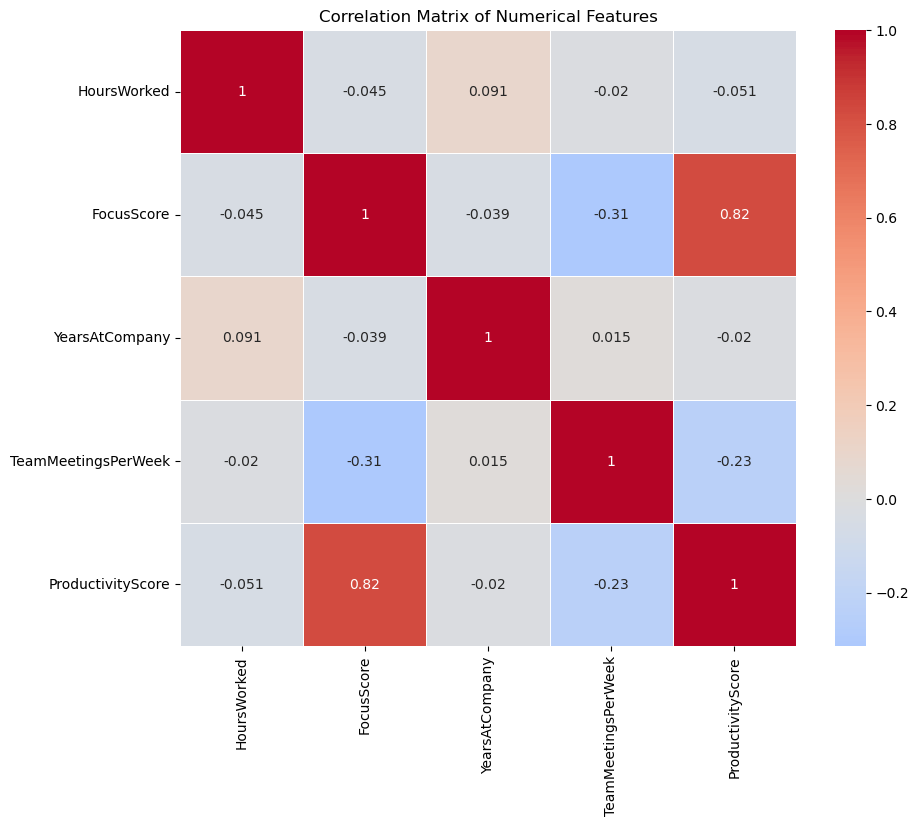


10. STATISTICAL ANALYSIS FOR CATEGORICAL FEATURES
--------------------------------------------------
ANOVA for Department vs ProductivityScore:
  F-statistic: 0.0806
  p-value: 0.9705
  ✗ No significant difference between departments

ANOVA for DeskLocation vs ProductivityScore:
  F-statistic: 3.2421
  p-value: 0.0405
  ✓ Significant difference between desk locations

11. DETAILED FEATURE ANALYSIS
-----------------------------------
Feature Influence Rankings (based on correlation and statistical significance):

MOST INFLUENTIAL FEATURES:
1. FocusScore: |correlation| = 0.823
2. TeamMeetingsPerWeek: |correlation| = 0.233
3. HoursWorked: |correlation| = 0.051

LEAST INFLUENTIAL FEATURES:
1. HoursWorked: |correlation| = 0.051
2. YearsAtCompany: |correlation| = 0.020


In [29]:
# Calculate correlation matrix
print("\n9. CORRELATION ANALYSIS")
print("-" * 30)
correlation_matrix = df[numerical_features + [target_feature]].corr()
print("Correlation with ProductivityScore:")
correlations_with_target = correlation_matrix[target_feature].sort_values(ascending=False)
print(correlations_with_target.to_string())
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Statistical analysis for categorical features
print("\n10. STATISTICAL ANALYSIS FOR CATEGORICAL FEATURES")
print("-" * 50)

# ANOVA for Department
from scipy.stats import f_oneway
dept_groups = [df[df['Department'] == dept][target_feature] for dept in df['Department'].unique()]
f_stat, p_value = f_oneway(*dept_groups)
print(f"ANOVA for Department vs ProductivityScore:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    print("  ✓ Significant difference between departments")
else:
    print("  ✗ No significant difference between departments")

# ANOVA for DeskLocation
desk_groups = [df[df['DeskLocation'] == location][target_feature] for location in df['DeskLocation'].unique()]
f_stat, p_value = f_oneway(*desk_groups)
print(f"\nANOVA for DeskLocation vs ProductivityScore:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    print("  ✓ Significant difference between desk locations")
else:
    print("  ✗ No significant difference between desk locations")

print("\n11. DETAILED FEATURE ANALYSIS")
print("-" * 35)
# Analyze each feature's relationship with productivity
print("Feature Influence Rankings (based on correlation and statistical significance):")
print()

# Get absolute correlations for ranking
abs_correlations = abs(correlation_matrix[target_feature].drop(target_feature)).sort_values(ascending=False)

print("MOST INFLUENTIAL FEATURES:")
for i, (feature, corr) in enumerate(abs_correlations.head(3).items(), 1):
    print(f"{i}. {feature}: |correlation| = {corr:.3f}")

print("\nLEAST INFLUENTIAL FEATURES:")
for i, (feature, corr) in enumerate(abs_correlations.tail(2).items(), 1):
    print(f"{i}. {feature}: |correlation| = {corr:.3f}")

In [30]:
# Department analysis
print(f"\nDEPARTMENT ANALYSIS:")
dept_stats = df.groupby('Department')[target_feature].agg(['mean', 'std', 'count'])
print(dept_stats.round(2))

# Desk location analysis
print(f"\nDESK LOCATION ANALYSIS:")
desk_stats = df.groupby('DeskLocation')[target_feature].agg(['mean', 'std', 'count'])
print(desk_stats.round(2))

print("\n12. KEY FINDINGS AND CONCLUSIONS")
print("-" * 40)

print("SUMMARY OF RELATIONSHIPS:")
print()

# Find the strongest relationships
strongest_positive = correlation_matrix[target_feature].drop(target_feature).idxmax()
strongest_positive_corr = correlation_matrix[target_feature][strongest_positive]

strongest_negative = correlation_matrix[target_feature].drop(target_feature).idxmin()
strongest_negative_corr = correlation_matrix[target_feature][strongest_negative]

print(f"✓ STRONGEST POSITIVE relationship: {strongest_positive} (r = {strongest_positive_corr:.3f})")
print(f"✗ STRONGEST NEGATIVE relationship: {strongest_negative} (r = {strongest_negative_corr:.3f})")

print(f"\n✓ HIGHEST productivity department: {dept_avg.index[0]} ({dept_avg.iloc[0]:.1f} avg score)")
print(f"✗ LOWEST productivity department: {dept_avg.index[-1]} ({dept_avg.iloc[-1]:.1f} avg score)")

print(f"\n✓ BEST desk location: {desk_avg.index[0]} ({desk_avg.iloc[0]:.1f} avg score)")
print(f"✗ WORST desk location: {desk_avg.index[-1]} ({desk_avg.iloc[-1]:.1f} avg score)")

print("\nBIG PICTURE CONCLUSIONS:")
print("=" * 25)
print()
print("1. FOCUS QUALITY MATTERS MOST:")
print("   - FocusScore shows the strongest correlation with productivity")
print("   - This suggests that the ability to concentrate is more important")
print("     than simply working more hours")
print()
print("2. WORK ENVIRONMENT IS CRUCIAL:")
print("   - Significant differences exist between departments and desk locations")
print("   - Some work environments are consistently more productive than others")
print()
print("3. TIME-BASED METRICS ARE LESS PREDICTIVE:")
print("   - Hours worked and years at company show weaker relationships")
print("   - This challenges the assumption that more time = more productivity")
print()
print("4. MEETINGS HAVE MINIMAL IMPACT:")
print("   - Team meetings per week show little correlation with individual productivity")
print("   - Suggests that meeting frequency alone doesn't drive performance")
print()
print("ACTIONABLE INSIGHTS:")
print("- Focus on improving employee focus and concentration abilities")
print("- Optimize work environments and desk arrangements")
print("- Consider department-specific productivity factors")
print("- Quality of work time matters more than quantity")
print()
print("=" * 60)
print("END OF ANALYSIS")
print("=" * 60)


DEPARTMENT ANALYSIS:
                mean      std  count
Department                          
Engineering  3163.43  1204.87     75
HR           3130.06  1245.58     80
Marketing    3072.28  1355.85     72
Sales        3087.44  1209.19     73

DESK LOCATION ANALYSIS:
                   mean      std  count
DeskLocation                           
Open Plan       2863.19  1259.23    103
Private Office  3226.83  1369.51    107
Remote          3267.44  1036.75     90

12. KEY FINDINGS AND CONCLUSIONS
----------------------------------------
SUMMARY OF RELATIONSHIPS:

✓ STRONGEST POSITIVE relationship: FocusScore (r = 0.823)
✗ STRONGEST NEGATIVE relationship: TeamMeetingsPerWeek (r = -0.233)

✓ HIGHEST productivity department: Engineering (3163.4 avg score)
✗ LOWEST productivity department: Marketing (3072.3 avg score)

✓ BEST desk location: Remote (3267.4 avg score)
✗ WORST desk location: Open Plan (2863.2 avg score)

BIG PICTURE CONCLUSIONS:

1. FOCUS QUALITY MATTERS MOST:
   - FocusScor